## This does the comparison between fit function and GP fitting on 3.6fb-1 of data and injecting a Gaussian signal based on a fit to our q* samples

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
import george
from george.kernels import MyDijetKernelSimp

import math
import time
import numpy as np
import scipy.stats as ss
import scipy.special as ssp
import scipy.optimize as op
from iminuit import Minuit
#pl = plt
#import ROOT as r
#from rootpy.plotting import Hist, Hist2D, Legend, Canvas
#import rootpy.plotting.root2matplotlib as rplt



## Section 1: including and visualizing 13 TeV dataset

### This set has all bins that equal 0 removed. These 0 points really bias the GP

In [3]:
#bin center
xval = np.array([1116.5, 1149.5, 
        1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 1553.0, 1593.5, 1635.0, 
        1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5, 2089.5, 2139.0, 2189.5, 2241.0, 
        2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 
        3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 
        4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5,
        5226.0, 5329.0, 5434.0, 5541.0, 5761.0, 5874.0, 5989.0, 6985.0])

#bin width
xerr = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 
           38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 
           51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 
           68.0, 70.0, 71.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0,
           91.0, 93.0, 94.0, 96.0, 97.0, 99.0, 102.0, 104.0, 106.0, 108.0, 112.0, 114.0, 116.0, 134.0])
#events
yval = np.array([94818.0, 79694.0, 68785.0, 57904.0, 49639.0, 43560.0, 36824.0, 31977.0, 27754.0, 23474.0, 20189.0,
                 17655.0, 15195.0, 13104.0, 11297.0, 9533.0, 8263.0, 7120.0, 6222.0, 5253.0, 4678.0, 4035.0, 3545.0,
                 2977.0, 2611.0, 2253.0, 1931.0, 1737.0, 1516.0, 1264.0, 1069.0, 958.0, 796.0, 690.0, 632.0, 527.0,
                 446.0, 386.0, 352.0, 296.0, 260.0, 223.0, 191.0, 142.0, 134.0, 120.0, 90.0, 87.0, 76.0, 69.0, 58.0,
                 46.0, 39.0, 29.0, 32.0, 23.0, 18.0, 11.0, 14.0, 10.0, 11.0, 4.0, 6.0, 5.0, 6.0, 2.0, 3.0, 4.0,
                 3.0, 1.0, 1.0, 1.0, 2.0, 1.0])



### This set has bins with 0 included

In [4]:
xvalO = np.array([1116.5, 1149.5,1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 
                  1553.0, 1593.5, 1635.0, 1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5,
                  2089.5, 2139.0, 2189.5, 2241.0, 2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 
                  2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 
                  3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 
                  4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5, 5124.5, 5226.0, 5329.0, 5434.0, 5541.0, 5650.0, 
                  5761.0, 5874.0, 5989.0, 6106.0, 6225.0, 6346.0, 6469.0, 6594.5, 6722.5, 6852.5, 6985.0])
yvalO =np.array([94818.0, 79694.0, 68785.0, 57904.0, 49639.0, 43560.0, 36824.0, 31977.0, 27754.0, 23474.0, 20189.0,
                 17655.0, 15195.0, 13104.0, 11297.0, 9533.0, 8263.0, 7120.0, 6222.0, 5253.0, 4678.0, 4035.0, 3545.0,
                 2977.0, 2611.0, 2253.0, 1931.0, 1737.0, 1516.0, 1264.0, 1069.0, 958.0, 796.0, 690.0, 632.0, 527.0,
                 446.0, 386.0, 352.0, 296.0, 260.0, 223.0, 191.0, 142.0, 134.0, 120.0, 90.0, 87.0, 76.0, 69.0, 58.0,
                 46.0, 39.0, 29.0, 32.0, 23.0, 18.0, 11.0, 14.0, 10.0, 11.0, 4.0, 6.0, 5.0, 6.0, 2.0, 0.0, 3.0, 4.0,
                 3.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])
xerrO = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 
                  43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 
                  57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 72.0, 73.0, 
                  75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0, 91.0, 93.0, 94.0, 96.0,
                  97.0, 99.0, 101.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0,
                  124.0, 127.0, 129.0, 131.0, 134.0])
#bin low edge
xlowO = [1100.0, 1133.0, 1166.0, 1200.0, 1234.0, 1269.0, 1305.0, 1341.0, 1378.0, 1416.0, 1454.0, 1493.0, 
                  1533.0, 1573.0, 1614.0, 1656.0, 1698.0, 1741.0, 1785.0, 1830.0, 1875.0, 1921.0, 1968.0, 2016.0, 
                  2065.0, 2114.0, 2164.0, 2215.0, 2267.0, 2320.0, 2374.0, 2429.0, 2485.0, 2542.0, 2600.0, 2659.0, 
                  2719.0, 2780.0, 2842.0, 2905.0, 2969.0, 3034.0, 3100.0, 3167.0, 3235.0, 3305.0, 3376.0, 3448.0,
                  3521.0, 3596.0, 3672.0, 3749.0, 3827.0, 3907.0, 3988.0, 4070.0, 4154.0, 4239.0, 4326.0, 4414.0,
                  4504.0, 4595.0, 4688.0, 4782.0, 4878.0, 4975.0, 5074.0, 5175.0, 5277.0, 5381.0, 5487.0, 5595.0,
                  5705.0, 5817.0, 5931.0, 6047.0, 6165.0, 6285.0, 6407.0, 6531.0, 6658.0, 6787.0, 6918.0, 7052.0]

In [5]:
newxlow=[]
for ibin, binn in enumerate(xlowO[:-1]):
    if yvalO[ibin] < 1:
        print yvalO[ibin]
        continue
    else: newxlow.append(binn)
print newxlow
        

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[1100.0, 1133.0, 1166.0, 1200.0, 1234.0, 1269.0, 1305.0, 1341.0, 1378.0, 1416.0, 1454.0, 1493.0, 1533.0, 1573.0, 1614.0, 1656.0, 1698.0, 1741.0, 1785.0, 1830.0, 1875.0, 1921.0, 1968.0, 2016.0, 2065.0, 2114.0, 2164.0, 2215.0, 2267.0, 2320.0, 2374.0, 2429.0, 2485.0, 2542.0, 2600.0, 2659.0, 2719.0, 2780.0, 2842.0, 2905.0, 2969.0, 3034.0, 3100.0, 3167.0, 3235.0, 3305.0, 3376.0, 3448.0, 3521.0, 3596.0, 3672.0, 3749.0, 3827.0, 3907.0, 3988.0, 4070.0, 4154.0, 4239.0, 4326.0, 4414.0, 4504.0, 4595.0, 4688.0, 4782.0, 4878.0, 4975.0, 5175.0, 5277.0, 5381.0, 5487.0, 5705.0, 5817.0, 5931.0, 6918.0]


In [6]:
np.save("xvalO",xvalO)
np.save("yvalO", yvalO)
np.save("xerrO", xerrO)
np.save("xlowO", xlowO)
np.save("xval",xval)
np.save("yval", yval)
np.save("xerr", xerr)

### 4 parameters fit function

In [7]:
def sig_model(x, N=1e5, mass=2000., width=100., xErr=xerr):
    return N*(np.exp(-(x-mass)**2/2/width/width)/np.sqrt(2*np.pi)/width)*xErr

In [8]:
def model_3param(t, params, xErr=xerr): 
    p0, p1, p2 = params
    sqrts = 13000.
    return (p0 * ((1.-t/sqrts)**p1) * (t/sqrts)**(p2))*(xErr)  #1./(t/sqrts)

def model_5param(t, params, xErr=xerr): 
    p0, p1, p2, p3, p4 = params
    sqrts = 13000.
    return (p0 * ((1.-t/sqrts)**p1) * (t/sqrts)**(p2+p3*np.log(t/sqrts)+p4*np.log(t/sqrts)**2))*(xErr)

## Set up minimization. Look at GP and fit function background only fits to data, and GP and fit function signal+background fits to data+signal

### Calculate bin by bin significance
### calculate bin p value, convert to significance (z). If z is negative, set to 0. If bkg < data, make z negative

In [9]:
def calcSignificance(Data, Bkg):
    pvals = []
    zvals = []
    chi2 = 0
    for i, nD in enumerate(Data):
        nB = Bkg[i]
        if nD != 0:
            if nB > nD:
                #pval = 1.-r.TMath.Gamma(nD+1.,nB)
                pval = 1.-ssp.gammainc(nD+1.,nB)
            else:
                #pval = pval = r.TMath.Gamma(nD,nB)
                pval = ssp.gammainc(nD,nB)
            prob = 1-2*pval
            if prob > -1 and prob < 1:
                #zval = math.sqrt(2.)*r.TMath.ErfInverse(prob)
                zval = math.sqrt(2.)*ssp.erfinv(prob)
            else:
                zval = np.inf
               
            if zval > 100: zval = 20
            if zval < 0: zval = 0
            if (nD < nB): zval = -zval
        else: zval = 0
            
        zvals.append(zval)
        chi2 += ((nD - nB) ** 2 / abs(nB))
    return zvals, chi2


def simpleLogPoisson(x, par):
    if x < 0: 
        return np.inf
    elif (x == 0): return -1.*par
    else:
        #lnpoisson = x*np.log(par)-par-r.TMath.LnGamma(x+1.)
        lnpoisson = x*np.log(par)-par-ssp.gammaln(x+1.)
        return lnpoisson
    
def makeToys(dataset, nPseudo=1000, lumi = 3.6):
    toys = []
    for n in range(nPseudo):
        pseudo = np.random.poisson(dataset*lumi/3.6)
        toys.append(pseudo)
    return toys

def removeZeros(data):
    indices = [i for i, x in enumerate(data) if x == 0]
    newylist=[]
    newxlist=[]
    newxerrlist=[]
    for k in range(len(data)):
        if k not in indices:
            newylist.append(data[k])
            newxlist.append(xvalO[k])
            newxerrlist.append(xerrO[k])
    return np.array(newylist), np.array(newxlist), np.array(newxerrlist)

In [10]:
#background only plots
def makePrettyPlots(xs, ys, bkgs, title, col = 'g', ymax = 2e5):
    f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,12), gridspec_kw = {'height_ratios':[3, 1]})
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="data+signal")
    bkgPlot, =ax1.plot(xs, bkgs, color=col, linewidth=3.0, label="bkg only")
    ax1.legend()
    ax1.set_ylabel('Events', fontsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.01, ymax])


  
    #bin by bin significance    
    zvals, chi2 = calcSignificance(ys, bkgs)
    print "chi2", chi2
    h1 = Hist(xlowO,markersize=0)
    for x in range(len(zvals)):
        if zvals[x] == np.inf or zvals[x] == -np.inf: h1[x] = 20
        else: h1[x] = zvals[x]  

    
    h1.fillstyle = 'solid'
    if col == 'g':
         h1.fillcolor = 'green'
    elif col == 'b':
         h1.fillcolor = 'blue'
    elif col == 'r':
         h1.fillcolor = 'red'
    else:
        h1.fillcolor = 'black'
    h1.linecolor = 'black'
    h1.linewidth = 1
    h1.Draw("histX0")
    rplt.bar(h1, xerr=None, yerr=None)
    ax2.axhline(0, color='black', lw=1)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.set_xlabel(r"$m_{jj}$ [TeV]", fontsize=30)
    ax2.set_ylabel('Significance', fontsize=20)
    ax2.set_xscale('log')
    ax2.set_xlim([1000, 7500])
    ax2.set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    minor_ticks = np.arange(1000, 7500, 100)
    ax2.set_xticks(minor_ticks, minor=True)  
    labels = ["1","2","3","4","5","6","7"]
    ax2.set_xticklabels(labels)
    ax2.set_ylim([-5, 5])
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)    
    plt.show()


In [11]:
#comparing background only and background + signal fit to data + siganl
def makePrettyPlots_compare(xs, ys, bkggp, bkgff, title, ymax = 2e5):
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(12,12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="Data")
    bkg1Plot, = ax1.plot(xs, bkggp, color='g', linewidth=3.0, label="Gaussian Process")
    bkg2Plot, = ax1.plot(xs, bkgff, color='b', linewidth=3.0, label="3 Parameter Fit Function")
    ax1.legend()
    ax1.set_ylabel('Events', fontsize=20)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.3, ymax])
    ax1.tick_params(axis='y', labelsize=20)

    #bin by bin significance   
    zvals_1, chi2_1 = calcSignificance(ys, bkggp)
    print "chi2 bkg+signal mu=0", chi2_1
    h1 = Hist(xlowO,markersize=0)
    for x in range(len(zvals_1)):
        if zvals_1[x] == np.inf or zvals_1[x] == -np.inf: h1[x] = 20
        else: h1[x] = zvals_1[x]  
    h1.fillstyle = 'solid'
    h1.fillcolor = 'green'
    h1.linecolor = 'black'
    h1.linewidth = 1
    h1.Draw("histX0")

    rplt.bar(h1, xerr=None, yerr=None, axes=ax2)
    ax2.axhline(0, color='black', lw=1)
    ax2.set_ylabel('Significance', fontsize=20)
    ax2.set_xscale('log')
    ax2.tick_params(axis='y', labelsize=20)
    ax2.set_xlim([1000, 7500])
    ax2.set_ylim([-5, 5])


    zvals_2, chi2_2 = calcSignificance(ys, bkgff)
    print "chi2 bkg+signal", chi2_2
    h2 = Hist(xlowO,markersize=0)
    for x in range(len(zvals_2)):
        if zvals_2[x] == np.inf or zvals_2[x] == -np.inf: h2[x] = 20
        else: h2[x] = zvals_2[x]  
    h2.fillstyle = 'solid'
    h2.fillcolor = 'blue'
    h2.linecolor = 'black'
    h2.linewidth = 1
    h2.Draw("histX0")
    rplt.bar(h2, xerr=None, yerr=None, axes=ax3)
    ax3.axhline(0, color='black', lw=1)
    ax3.set_xlabel(r"$m_{jj}$ [TeV]", fontsize=30)
    ax3.set_ylabel('Significance', fontsize=20)
    ax3.set_xscale('log')
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.set_ylim([-5, 5])
    ax3.set_xlim([1000, 7500])
    

    ax3.set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    minor_ticks = np.arange(1000, 7500, 100)
    ax3.set_xticks(minor_ticks, minor=True)  
    labels = ["1","2","3","4","5","6","7"]
    ax3.set_xticklabels(labels)
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)    
    plt.show()


### Calculate NLL for fit function using poisson statistics - with or without signal. lnprob functions calls logLike function to calculate NLL.

In [12]:
class logLike_3ff:
    def __init__(self, x, y, xe):
        self.x = x
        self.y = y
        self.xe = xe
    def __call__(self, p0, p1, p2):
        params = p0, p1, p2
        bkgFunc = model_3param(self.x, params, self.xe)       
        logL = 0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin]
            logL += -simpleLogPoisson(data, bkg)
        try:
            logL
            return logL
        except:
            return np.inf
    


class logLike_5ff:
    def __init__(self, x, y, xe):
        self.x = x
        self.y = y
        self.xe = xe
    def __call__(self, p0, p1, p2, p3, p4):
        params = p0, p1, p2, p3, p4
        bkgFunc = model_5param(self.x, params, self.xe)       
        logL = 0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin] 
            logL += -simpleLogPoisson(data, bkg)
        try:
            logL
            return logL
        except:
            return np.inf
    
class logLike_5ff_sig:
    def __init__(self, x, y, xe, sigTemp):
        self.x = x
        self.y = y
        self.xe = xe
        self.sigTemp = sigTemp
    def __call__(self, p0, p1, p2, p3, p4, N):
        params = p0, p1, p2, p3, p4
        nSignal = N
        bkgFunc = model_5param(self.x, params, self.xe)       
        logL = 0
        sig=0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin] 
            sig = self.sigTemp[ibin]*nSignal
            logL += -simpleLogPoisson(data, bkg+sig)
        try:
            logL
            return logL
        except:
            return np.inf

### Minimize NLL of fit function.  fit functions call Minuit to minimize lnLike functions. Kick initial parameters, constrain parameters.  Minimize NLL of fit function with signal - add in signal strength parameter

In [13]:
def fit_3ff(num,lnprob, Print=True):
  #  np.random.seed(1234)
    bestval = np.inf
    bestargs = (0., 0., 0.)
    for i in range(num):
        init0 = np.random.random() * 1.
        init1 = np.random.random() * 8.
        init2 = np.random.random() * 6.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  p0 = init0, p1 = init1, p2 = init2,
                  error_p0 = 1e-2, error_p1 = 1e-1, error_p2 = 1e-1, 
                  limit_p0 = (0, 100.), limit_p1 = (-100., 100.), limit_p2 = (-100., 100.))
        m.migrad()
        if m.fval < bestval:
            bestval = m.fval
            bestargs = m.args 
    if Print:
        print "min LL", bestval
        print "best fit vals", bestargs
    return bestval, bestargs


def fit_5ff(num,lnprob, Print = True):
    bestval = np.inf
    bestargs = (0., 0., 0., 0., 0.)
    for i in range(num):
        init0 = np.random.random() * 1.
        init1 = np.random.random() * 8.
        init2 = np.random.random() * 6.
        init3 = np.random.random() * 1.
        init4 = np.random.random() * 1.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  p0 = init0, p1 = init1, p2 = init2, p3 = init3, p4 = init4,
                  error_p0 = 1e-2, error_p1 = 1e-1, error_p2 = 1e-1, error_p3 = 1e-2, error_p4 = 1e-2,
                  limit_p0 = (0, 10), limit_p1 = (-20, 20), limit_p2 = (-20, 20), 
                   limit_p3 = (-20, 20), limit_p4 = (0, 50))
        m.migrad()
        if m.fval < bestval:
            bestval = m.fval
            bestargs = m.args 
    if Print:
        print "min LL",bestval
        print "best fit vals", bestargs
    return bestval, bestargs



### Minimize NLL of GP using george lnlikelihood function - logLike functions calls gp.lnlikelihood to calculate NLL. 

### Minimize NLL of GP. call Minuit to minimize logLike functions. Kick initial parameters, constrain parameters. Minimize NLL of GP with signal - add in signal strength parameter

In [14]:
def model_gp(params, t, xerr=xerr): 
    p0, p1, p2 = params
    sqrts = 13000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2))*xerr

def fit_gp_minuit(num, lnprob):
    bestval = np.inf
    bestargs = (0, 0, 0, 0, 0, 0, 0, 0)
    for i in range(num):
        init0 = np.random.random() * 1e6+1
        init1 = np.random.random() * 400.
        init2 = np.random.random() * 10. 
        init3 = np.random.random() * -100.
        init4 = np.random.random() * 650.
        init5 = np.random.random() * 1.
        init6 = np.random.random() * 1.
        init7 = np.random.random() * -1.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  Amp = init0, decay = init1, length = init2, power = init3, sub = init4, 
                   p0 = init5, p1 = init6, p2 = init7,
                  error_Amp = 1e1, error_decay = 1e1, error_length = 1e-1, error_power = 1e-1, 
                   error_sub = 1e-1, error_p0 = 1e-2, error_p1 = 1e-2, error_p2 = 1e-2,
                  limit_Amp = (1, 1e15), limit_decay = (0, 500), limit_length = (0, 200), 
                   limit_power = (-200, 200), limit_sub = (0, 1000), limit_p0 = (0,10), 
                   limit_p1 = (0, 10), limit_p2 = (-10,0)) 
        m.migrad()
        if m.fval < bestval:
            bestval = m.fval
            bestargs = m.args 
    print "min LL", bestval
    print "best fit vals",bestargs
    return bestval, bestargs


class logLike_gp:
    def __init__(self, x, y, xerr):
        self.x = x
        self.y = y
        self.xerr = xerr
    def __call__(self, Amp, decay, length, power, sub, p0, p1, p2):
        kernel = Amp * MyDijetKernelSimp(a = decay, b = length, c = power, d = sub)
        gp = george.GP(kernel)
        try:
            gp.compute(self.x, np.sqrt(self.y))
            return -gp.lnlikelihood(self.y - model_gp((p0,p1,p2), self.x, self.xerr))
        except:
            return np.inf


In [15]:
def basicPlot(xs, ys, bkgs, title, col='g'):
    f, (ax1) = plt.subplots(1, sharex=True, figsize=(12,12))
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="QCD MC")
    bkgPlot, = ax1.plot(xs, bkgs, color=col, linewidth=3.0, label="GP fit")
    ax1.legend()
    ax1.set_ylabel('Events', fontsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.01, 2e6])

### Fit GP to data only (fixed hyperparameters set here)

In [16]:

lnProb = logLike_gp(xval,yval, xerr)
bestval, best_fit_gp = fit_gp_minuit(100, lnProb)
fixedHyperparams = best_fit_gp
print "hyperparams", fixedHyperparams
Amp, decay, length, power, sub, p0, p1, p2 = best_fit_gp
kernel = Amp * MyDijetKernelSimp(a = decay, b = length, c = power, d=sub)
gp = george.GP(kernel)
gp.compute(xval, np.sqrt(yval))
meanGP, covGP = gp.predict(yval - model_gp(best_fit_gp[5:],xval, xerr), xvalO)
meanGPnom = meanGP+ model_3param(xvalO,best_fit_gp[5:],xerrO)



min LL 310.530154303
best fit vals (25815263.094663866, 162.33166968084734, 0.1197495441974783, -133.47229841179177, 2.18750063777845, 0.016480180721412663, 8.443866371145903, -5.225093900388308)
hyperparams (25815263.094663866, 162.33166968084734, 0.1197495441974783, -133.47229841179177, 2.18750063777845, 0.016480180721412663, 8.443866371145903, -5.225093900388308)


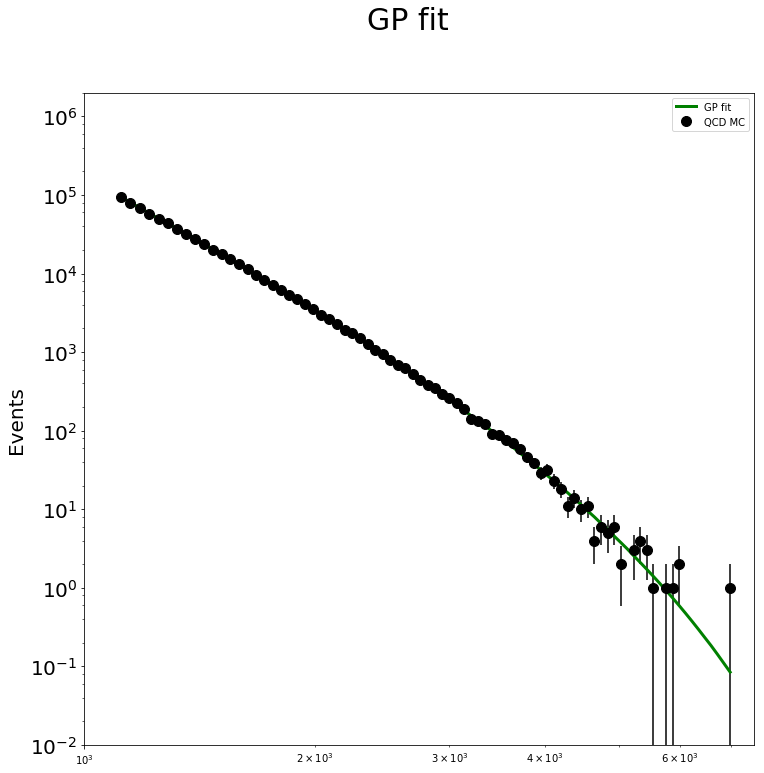

In [17]:
label = "GP fit"
basicPlot(xvalO, yvalO, meanGPnom, label)

In [20]:
#label = "GP fit"
#makePrettyPlots(xvalO, yvalO, meanGPnom, label)

### 3 parameter fit

In [19]:
lnProb = logLike_3ff(xvalO,yvalO,xerrO)
bestval, best_fit_new = fit_3ff(100, lnProb)
#background with best fit parameters
bkg3param = model_3param(xvalO, best_fit_new, xerrO)
print best_fit_new
label = "3 parameter fit"
#makePrettyPlots(xvalO, yvalO, bkg3param, label, 'b')

min LL 318.093380573
best fit vals (0.016089678408287567, 8.382831170438962, -5.232713956269947)
(0.016089678408287567, 8.382831170438962, -5.232713956269947)


### 5 parameter fit

In [20]:
lnProb = logLike_5ff(xvalO,yvalO,xerrO)
bestval, best_fit_new = fit_5ff(100, lnProb)
#background with best fit parameters
bkg5param = model_5param(xvalO, best_fit_new, xerrO)

print best_fit_new
label = "5 parameter fit"
#makePrettyPlots(xvalO, yvalO, bkg5param, label, 'b')

/Users/Darren/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


min LL 318.043416315
best fit vals (0.13444702579282763, 10.061980345154478, -3.263578070286446, 0.6902727520111931, 0.08776665794893723)
(0.13444702579282763, 10.061980345154478, -3.263578070286446, 0.6902727520111931, 0.08776665794893723)


In [21]:
toyList = makeToys(bkg5param, 10000)
lumiList = [5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]
lumiToyDict={}
for lum in lumiList:
    lumiToyDict[lum] = makeToys(bkg5param, 10000, lum)
standardParamSets = [(1500,2000,250), (750 ,2500, 250), (200, 3000, 250), (75, 3500, 250), (50, 4000, 250), 
             (25, 4500, 250), (20, 5000, 250), (15,5500, 250), (15, 6000,250)]
np.save("toyList",toyList)
np.save("lumiToyList", lumiToyDict)
np.save("initialGPfit", meanGPnom)
np.save("fixedHyperparams", fixedHyperparams)


In [22]:
#label = "Background only fit to 13 TeV data"
#makePrettyPlots_compare(xvalO, yvalO, meanGPnom, bkg5param, label)

In [23]:
sigDict={}
sigDictO={}
for pSet in standardParamSets:
    n, m, w = pSet
    sigDict[m]=[]
    sigDictO[m]=[]
    for itoy, toy in enumerate(toyList):    
        ytoy, xtoy, xtoyerr = removeZeros(toy)
        signalTemplate = sig_model(xtoy, n, m, w, xtoyerr)
        signalTemplate = np.random.poisson(np.around(signalTemplate))
        sigDict[m].append(signalTemplate)
        
        signalTemplateO = sig_model(xvalO, n, m, w, xerrO)
        signalTemplateO = np.random.poisson(np.around(signalTemplateO))
        sigDictO[m].append(signalTemplateO)

np.save("signalToys", sigDict)
np.save("signalToysO", sigDictO)